# Informações inciciais

* Os dados utilizados são os arquivos criados no criando_df_2020_2021_2022_e_2023_ate_29_07_2023.ipynb;
* Esse projeto tem como objetivo fazer uma análise do desempenho de Abel Ferreira no comando do Palmeiras.

# Importanto bibliotecas e dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_2020 = pd.read_csv('palmeiras_2020.csv')
df_2021 = pd.read_csv('palmeiras_2021.csv')
df_2022 = pd.read_csv('palmeiras_2022.csv')
df_2023 = pd.read_csv('palmeiras_2023.csv')

# Criando funções

In [3]:
# criando função que gera o resultado (V, E ou D) das partidas

def gerar_resultado(x):  # x é o dataframe
  r = []
  for i in range(x.shape[0]):
    if x['time_mandante'].iloc[i] == 'Palmeiras':
      if x['gols_mandante'].iloc[i] > x['gols_visitante'].iloc[i]:
        r.insert(i, 'V')
      elif x['gols_mandante'].iloc[i] == x['gols_visitante'].iloc[i]:
        r.insert(i, 'E')
      else:
        r.insert(i, 'D')
    else:
      if x['gols_mandante'].iloc[i] > x['gols_visitante'].iloc[i]:
        r.insert(i, 'D')
      elif x['gols_mandante'].iloc[i] == x['gols_visitante'].iloc[i]:
        r.insert(i, 'E')
      else:
        r.insert(i, 'V')

  return r

In [4]:
# criando tabela de jogos como mandante e visitante

def gerar_tabela_por_tipo_de_jogo(x):

  filtro_1 = ['time_mandante == "Palmeiras"', 'time_visitante == "Palmeiras"', 'time_mandante == "Palmeiras" & Resultado == "V"', 'time_visitante == "Palmeiras" & Resultado == "V"', 'time_mandante == "Palmeiras" & Resultado == "E"', 'time_visitante == "Palmeiras" & Resultado == "E"']

  j = [0, 0]
  v = [0, 0]
  e = [0, 0]
  d = [0, 0]
  ap = [0, 0]
  g_mandante = [0, 0]
  g_visitante = [0, 0]

  for i in range(2):
    j[i] = x.query(filtro_1[i]).shape[0]
    v[i] = x.query(filtro_1[i+2])['Resultado'].shape[0]
    e[i] = x.query(filtro_1[i+4])['Resultado'].shape[0]
    d[i] = j[i] - v[i] - e[i]
    ap[i] = round(((3*v[i])+e[i])*100/(3*j[i]),2)
    g_mandante[i] = x.query(filtro_1[i])['gols_mandante'].sum()
    g_visitante[i] = x.query(filtro_1[i])['gols_visitante'].sum()

  aux = pd.DataFrame({'tipo de jogo': ['Mandante', 'Visitante'],'jogo': j, 'V': v, 'E': e, 'D': d, 'Aproveitamento (%)': ap, 'Gols marcados': [g_mandante[0], g_visitante[1]], 'Gols sofridos': [g_mandante[1], g_visitante[0]]})

  return aux

In [5]:
# criando tabela do aproveitamento acumulado de 5 partidas

def gerar_tabela_aproveitamento_acumulado(x):

  ap = []
  for i in range(x.shape[0] - 4):
    aux_1 = [0 , 0]
    aux_1[0] = (x.iloc[i : i+5].query('Resultado == "V"')).shape[0]
    aux_1[1] = (x.iloc[i : i+5].query('Resultado == "E"')).shape[0]
    p = round((3*aux_1[0]+aux_1[1])*100/15,2)
    ap.insert(i, p)

  aux_2=pd.DataFrame({'Conjunto de partidas': [i+1 for i in range(x.shape[0] - 4)], 'Aproveitameto acumulado (%)': ap})

  return aux_2

# Criando a coluna de resultados

In [6]:
df_2020['Resultado'] = gerar_resultado(df_2020)
df_2021['Resultado'] = gerar_resultado(df_2021)
df_2022['Resultado'] = gerar_resultado(df_2022)
df_2023['Resultado'] = gerar_resultado(df_2023)

# Criando relação entre jogos como mandante e como visitante

In [7]:
df_2020_tipo_de_jogo = gerar_tabela_por_tipo_de_jogo(df_2020)
df_2021_tipo_de_jogo = gerar_tabela_por_tipo_de_jogo(df_2021)
df_2022_tipo_de_jogo = gerar_tabela_por_tipo_de_jogo(df_2022)
df_2023_tipo_de_jogo = gerar_tabela_por_tipo_de_jogo(df_2023)

In [8]:
df_2020_tipo_de_jogo

,tipo de jogo,jogo,V,E,D,Aproveitamento (%),Gols marcados,Gols sofridos
0,Mandante,10,6,4,0,73.33,20.0,13.0
1,Visitante,10,2,2,6,26.67,6.0,4.0


In [9]:
df_2021_tipo_de_jogo

,tipo de jogo,jogo,V,E,D,Aproveitamento (%),Gols marcados,Gols sofridos
0,Mandante,19,11,3,5,63.16,33.0,17.0
1,Visitante,19,9,3,7,52.63,25.0,26.0


In [10]:
df_2022_tipo_de_jogo

,tipo de jogo,jogo,V,E,D,Aproveitamento (%),Gols marcados,Gols sofridos
0,Mandante,19,13,4,2,75.44,39.0,15.0
1,Visitante,19,10,8,1,66.67,27.0,12.0


In [11]:
df_2023_tipo_de_jogo

,tipo de jogo,jogo,V,E,D,Aproveitamento (%),Gols marcados,Gols sofridos
0,Mandante,8,5,2,1,70.83,16.0,6.0
1,Visitante,8,2,5,1,45.83,12.0,8.0


# Criando análise de aproveitamento em 5 jogos

In [ ]:
df_2020_aproveitamento_acumulado = gerar_tabela_aproveitamento_acumulado(df_2020)
df_2021_aproveitamento_acumulado = gerar_tabela_aproveitamento_acumulado(df_2021)
df_2022_aproveitamento_acumulado = gerar_tabela_aproveitamento_acumulado(df_2022)
df_2023_aproveitamento_acumulado = gerar_tabela_aproveitamento_acumulado(df_2023)

In [ ]:
df_2020_aproveitamento_acumulado.head()

,Conjunto de partidas,Aproveitameto acumulado (%)
0,1,66.67
1,2,66.67
2,3,46.67
3,4,66.67
4,5,66.67


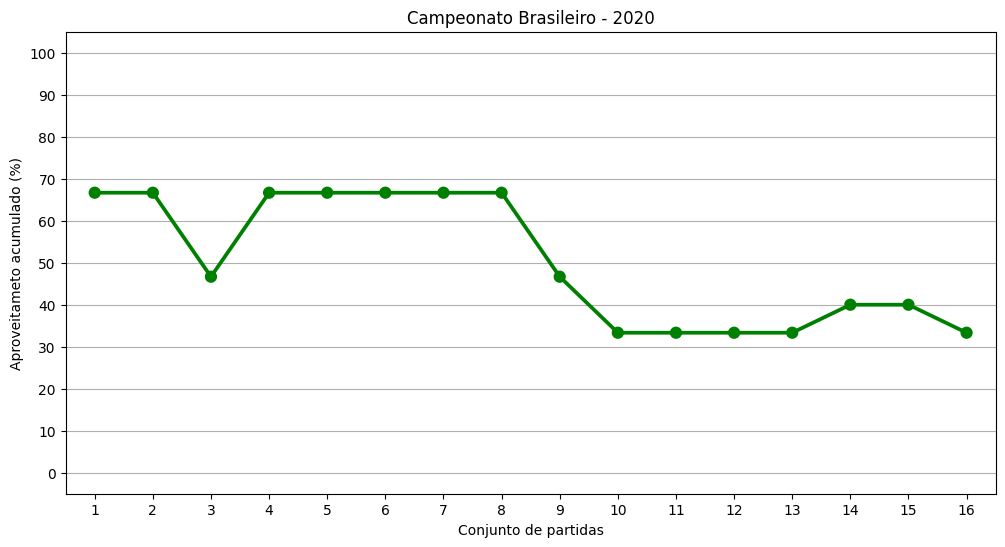

In [ ]:
plt.figure(figsize=(12,6))
plt.ylim(-5,105)
plt.yticks(np.arange(0, 105, step = 10))
plt.grid(axis = 'y')
plt.title('Campeonato Brasileiro - 2020')
graf_aproveitamento_2020 = sns.pointplot(data = df_2020_aproveitamento_acumulado, x = 'Conjunto de partidas', y = 'Aproveitameto acumulado (%)', color = 'g')

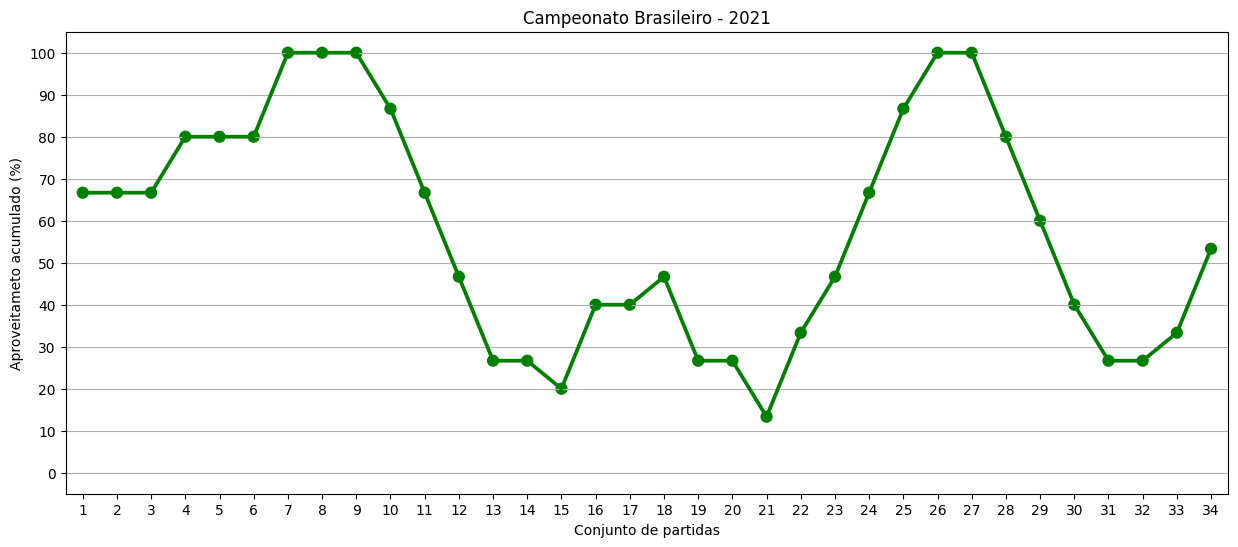

In [ ]:
plt.figure(figsize=(15,6))
plt.ylim(-5,105)
plt.yticks(np.arange(0, 105, step = 10))
plt.grid(axis = 'y')
plt.title('Campeonato Brasileiro - 2021')
graf_aproveitamento_2020 = sns.pointplot(data = df_2021_aproveitamento_acumulado, x = 'Conjunto de partidas', y = 'Aproveitameto acumulado (%)', color = 'g')

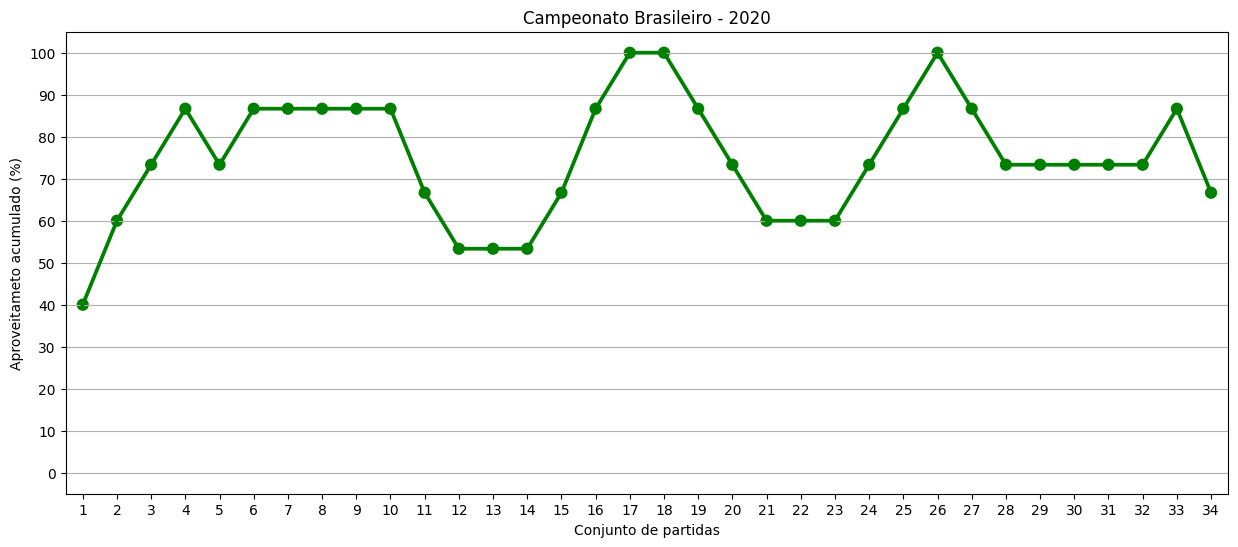

In [ ]:
plt.figure(figsize=(15,6))
plt.ylim(-5,105)
plt.yticks(np.arange(0, 105, step = 10))
plt.grid(axis = 'y')
plt.title('Campeonato Brasileiro - 2022')
graf_aproveitamento_2020 = sns.pointplot(data = df_2022_aproveitamento_acumulado, x = 'Conjunto de partidas', y = 'Aproveitameto acumulado (%)', color = 'g')

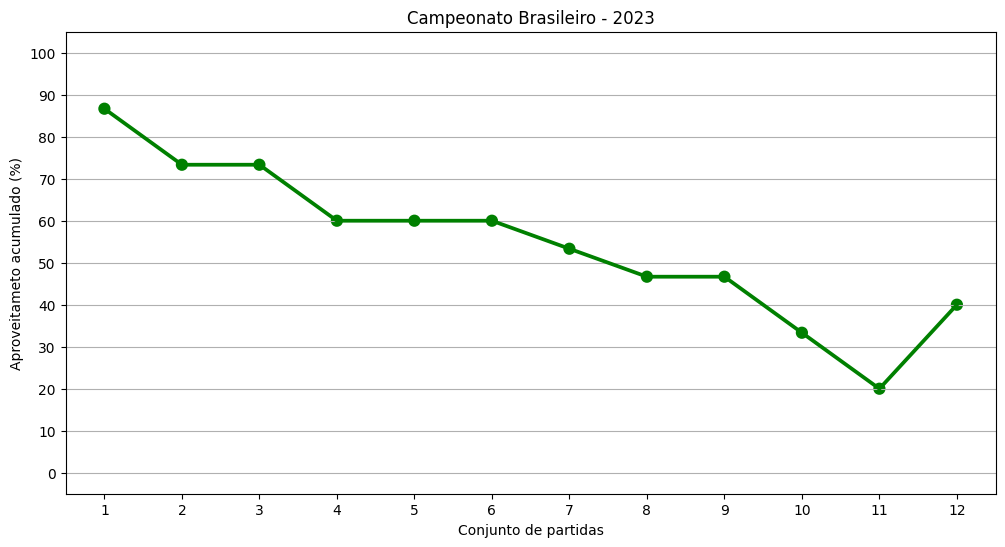

In [ ]:
plt.figure(figsize=(12,6))
plt.ylim(-5,105)
plt.yticks(np.arange(0, 105, step = 10))
plt.grid(axis = 'y')
plt.title('Campeonato Brasileiro - 2023')
graf_aproveitamento_2020 = sns.pointplot(data = df_2023_aproveitamento_acumulado, x = 'Conjunto de partidas', y = 'Aproveitameto acumulado (%)', color = 'g')

# Análises totais

## Análise por time

Há times que no DF estão com diferentes escritas, será feito a padronização primeiro

In [17]:
times = ['Vasco da Gama',
 'Internacional',
 'Sport Recife',
 'Flamengo',
 'Ceará',
 'Coritiba',
 'São Paulo',
 'Atlético-MG',
 'Juventude',
 'RB Bragantino',
 'Atlético-GO',
 'Chapecoense',
 'Corinthians',
 'América-MG',
 'Bahia',
 'Grêmio',
 'Santos',
 'Fluminense',
 'Fortaleza',
 'Cuiabá',
 'Athletico-PR',
 'Goiás',
 'Avaí',
 'Botafogo']

Alterações de nomes

'Goiás EC' : 'Goiás'

'Santos FC' : 'Santos'

'Ceará SC' : 'Ceará'

'Coritiba FC' : 'Coritiba'

'EC Bahia' : 'Bahia'

'Cuiabá-MT' : 'Cuiabá'

'Avaí FC' : 'Avaí'

In [19]:
alteracao = {'Goiás EC' : 'Goiás',
'Santos FC' : 'Santos',
'Ceará SC' : 'Ceará',
'Coritiba FC' : 'Coritiba',
'EC Bahia' : 'Bahia',
'Cuiabá-MT' : 'Cuiabá',
'Avaí FC' : 'Avaí'}

In [49]:
x = df_2020
y = df_2021
z = df_2022
w = df_2023
df = pd.concat([x,y,z,w], ignore_index = True)
df['time_mandante'].replace(alteracao, inplace = True)
df['time_visitante'].replace(alteracao, inplace = True)
tab = pd.DataFrame({'Times': times})
jogo = []
vit = []
emp = []
der = []
ap = []

for i in range(tab.shape[0]):
  tj = 0
  v = 0
  d = 0
  e = 0

  for j in range(df.shape[0]):
    t = tab['Times'].iloc[i]
    if df['time_mandante'].iloc[j] == t:
      tj = tj + 1
      if df['Resultado'].iloc[j] == 'V':
        v = v + 1
      elif df['Resultado'].iloc[j] == 'E':
        e = e + 1

    if df['time_visitante'].iloc[j] == t:
      tj = tj + 1
      if df['Resultado'].iloc[j] == 'V':
        v = v + 1
      elif df['Resultado'].iloc[j] == 'E':
        e = e + 1
    d = tj - (v+e)

  a = round(((3*v)+e)*100/(tj*3) ,2)

  jogo.insert(i,tj)
  vit.insert(i,v)
  emp.insert(i,e)
  der.insert(i,d)
  ap.insert(i,a)

tab['Jogos'] = jogo
tab['V'] = vit
tab['E'] = emp
tab['D'] = der
tab['Aproveitamento (%)'] = ap

tab.sort_values(by = 'Aproveitamento (%)', ascending= False ,inplace = True)

In [50]:
tab

,Times,Jogos,V,E,D,Aproveitamento (%)
2,Sport Recife,3,3,0,0,100.00
11,Chapecoense,2,2,0,0,100.00
15,Grêmio,4,3,1,0,83.33
8,Juventude,4,3,1,0,83.33
16,Santos,6,4,2,0,77.78
5,Coritiba,4,3,0,1,75.00
13,América-MG,4,3,0,1,75.00
10,Atlético-GO,5,3,2,0,73.33
12,Corinthians,6,4,1,1,72.22
22,Avaí,2,1,1,0,66.67


In [51]:
tab_times = tab[['V', 'E', 'D']]
tab_times.index = [tab['Times']]

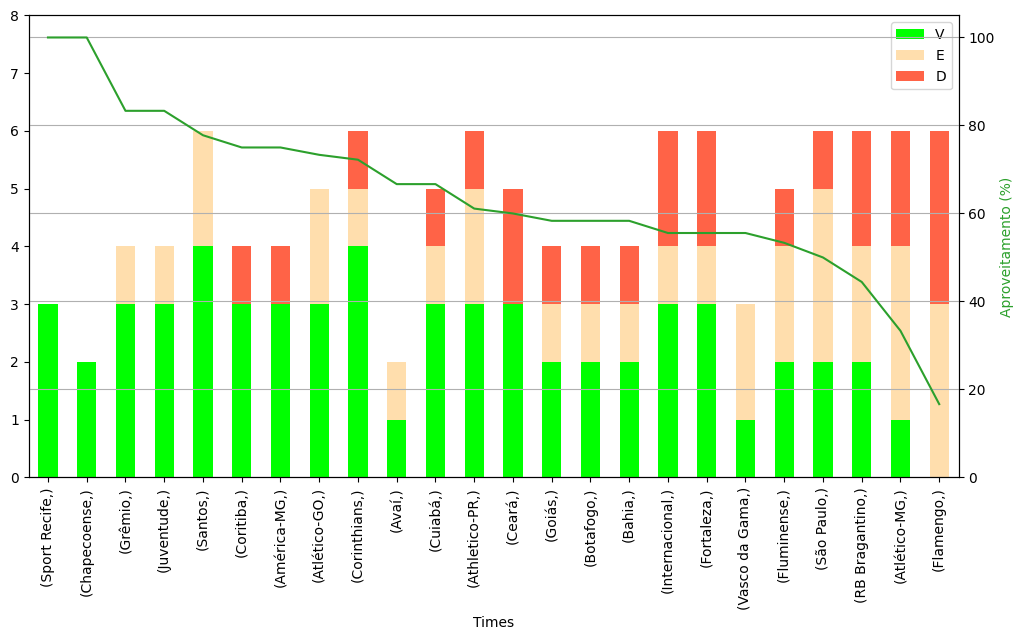

In [63]:
ax1.set_xlabel('Times')
ax1.set_ylabel('Jogos')
ax1 = tab_times.plot(kind= 'bar', stacked= True, color = ['lime', 'navajowhite', 'tomato'], figsize = (12,6))
plt.ylim(0,8)

ax2 = ax1.twinx()
ax2.set_ylabel('Aproveitamento (%)', color = 'tab:green')
ax2.plot(tab['Times'], tab['Aproveitamento (%)'], color = 'tab:green')
plt.ylim(0,105)
plt.grid(axis = 'y')

fig.tight_layout()


## Análises por técnicos

In [70]:
x = df_2020
y = df_2021
z = df_2022
w = df_2023
df = pd.concat([x,y,z,w], ignore_index = True)
tecnicos = pd.concat([df.query('time_mandante == "Palmeiras"')['tecnico_visitante'], df.query('time_visitante == "Palmeiras"')['tecnico_mandante']]).unique()
tab_tecnicos = pd.DataFrame({'Nomes': tecnicos})
jogo = []
vit = []
emp = []
der = []
ap = []

for i in range(tab_tecnicos.shape[0]):
  tj = 0
  v = 0
  d = 0
  e = 0

  for j in range(df.shape[0]):
    t = tab_tecnicos['Nomes'].iloc[i]
    if df['tecnico_visitante'].iloc[j] == t:
      tj = tj + 1
      if df['Resultado'].iloc[j] == 'V':
        v = v + 1
      elif df['Resultado'].iloc[j] == 'E':
        e = e + 1

    if df['tecnico_mandante'].iloc[j] == t:
      tj = tj + 1
      if df['Resultado'].iloc[j] == 'V':
        v = v + 1
      elif df['Resultado'].iloc[j] == 'E':
        e = e + 1
    d = tj - (v+e)

  a = round(((3*v)+e)*100/(tj*3) ,2)

  jogo.insert(i,tj)
  vit.insert(i,v)
  emp.insert(i,e)
  der.insert(i,d)
  ap.insert(i,a)

tab_tecnicos['Jogos'] = jogo
tab_tecnicos['V'] = vit
tab_tecnicos['E'] = emp
tab_tecnicos['D'] = der
tab_tecnicos['Aproveitamento (%)'] = ap

tab_tecnicos.sort_values(by = 'Aproveitamento (%)', ascending= False ,inplace = True)

In [81]:
tab_tecnicos.head()

,Nomes,Jogos,V,E,D,Aproveitamento (%)
14,Thiago Gomes,1,1,0,0,100.0
13,Dado Cavalcanti,1,1,0,0,100.0
1,Paulo Autuori,1,1,0,0,100.0
33,Umberto Louzer,2,2,0,0,100.0
34,Orlando Ribeiro,1,1,0,0,100.0


In [72]:
tab_tecnicos_mais_jogos = tab_tecnicos.query('Jogos > 2')

In [73]:
tab_tecnicos_mais_jogos

,Nomes,Jogos,V,E,D,Aproveitamento (%)
10,Jair Ventura,4,3,1,0,83.33
19,Toni Oliveira,3,2,1,0,77.78
21,Marquinhos Santos,3,2,1,0,77.78
37,Vagner Mancini,4,3,0,1,75.00
31,Luís Castro,3,2,0,1,66.67
2,Mano Menezes,3,2,0,1,66.67
18,J. de Amorim Campos,3,2,0,1,66.67
15,Fernando Diniz,3,1,2,0,55.56
7,Eduardo Barroca,3,1,2,0,55.56
17,Juan Pablo Vojvoda,5,2,1,2,46.67


In [77]:
tab_tecnicos2 = tab_tecnicos_mais_jogos[['V', 'E', 'D']]
tab_tecnicos2.index = [tab_tecnicos_mais_jogos['Nomes']]

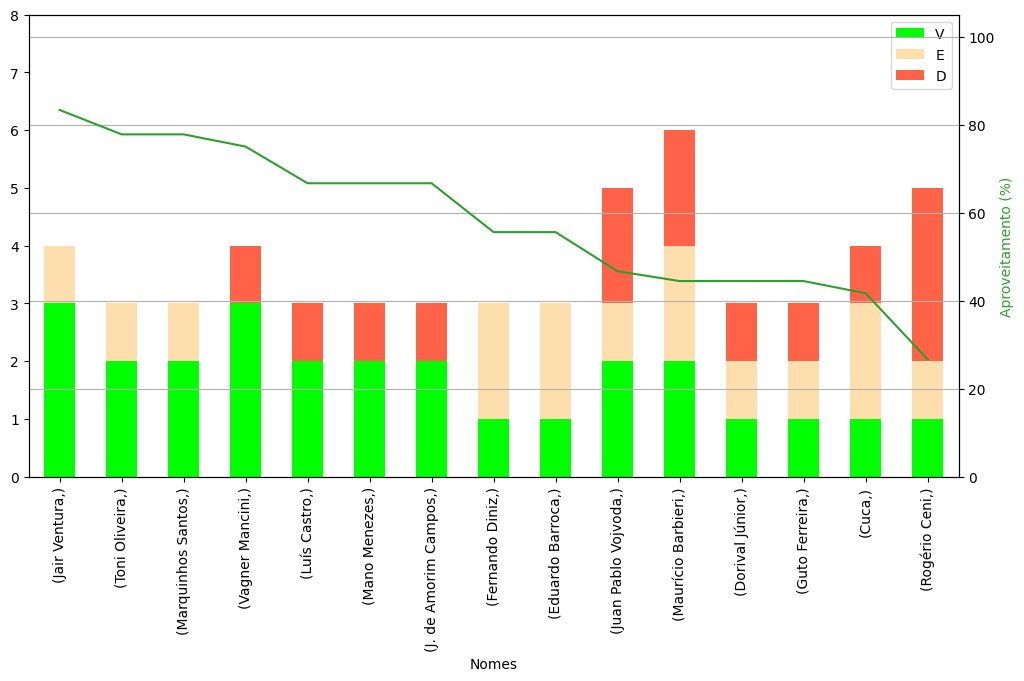

In [78]:
ax1.set_xlabel('Nomes')
ax1.set_ylabel('Jogos')
ax1 = tab_tecnicos2.plot(kind= 'bar', stacked= True, color = ['lime', 'navajowhite', 'tomato'], figsize = (12,6))
plt.ylim(0,8)

ax2 = ax1.twinx()
ax2.set_ylabel('Aproveitamento (%)', color = 'tab:green')
ax2.plot(tab_tecnicos_mais_jogos['Nomes'], tab_tecnicos_mais_jogos['Aproveitamento (%)'], color = 'tab:green')
plt.ylim(0,105)
plt.grid(axis = 'y')

fig.tight_layout()

# Conclusões

Análise por tipo de jogos:

* No início do trabalho, em 2020, Abel comandou o Palmeiras em 10 jogos como mandante e 10 como visitante. O aproveitamento como mandante (73,3%) foi muito superior ao aproveitamento como visitante (26,7%);

* No ano de 2021, Abel comandou o Palmeiras durante todo o campeonato. Neste período ele obteve também um melhor aproveitamento como mandante (63,2%), porém menor em comparação com 2020. Já como visitante, o aproveitamento melhorou (52,6%) em relação à 2020;

* Em 2022 o Palmeiras foi campeão brasileiro, e os aproveitamentos nas partidas foram os melhores da era Abel, tendo o aproveitamento como mandante superior ao aproveitamento como visitante (75,4% e 66,7%);

* Em 2023, dados até dia 30/07, o Palmeiras está apresentando um bom aproveitamento nos jogos como mandante (70,8%), muito superior ao aproveitamento como visitante (45,8%).

Análise do conjunto de 5 jogos:

* No ano de 2020, o Palmeiras na primeira metade dos jogos estava com um aproveitamento quase sempre superior à 50%, porém, na segunda metade dos jogos o aproveitamento foi caindo rodada a rodada;

* No ano de 2021, o Palmeiras obteve duarante aproximadamente 2/3 do campeonato um aproveitamento superior à 50%, porém o meio do campeonato o time apresentou desempenho ruim, com aproveitamento inferior à 50%;

* No ano de 2022, o aproveitamento do Palmeiras foi quase sempre superior à 50% durante todo o campeonato, tendo períodos longos com aproveitamento superior à 70%;

* Em 2023, o desempenho começou muito bem, mas vem caindo coconforme o campeonato avança.

Análise por times:

* Abel possui um aproveitamento superior à 50% contra a maioria dos times que enfrentou;

* Os piores aproveitamentos são contra RB Bragantino, Atlético-MG e Flamengo, sendo que no campeonato brasileiro, Abel ainda não obteve vitória contra o Flamengo.

Análise por técnicos adversários:

* Abel possui um aproveitamento superior à 50% contra a maioria dos técnicos com quem disputou mais de 2 jogos;

* O técnico que Abel mais enfrentou foi Maurício Barbieri;

* O pior aproveitamento de Abel é contra Rogério Ceni.